In [1]:
import tensorflow as tf
from tensorflow import keras
from mnist import MNIST

import numpy as np
import matplotlib.pyplot as plt

# Importing the Data

In [2]:
mndata = MNIST('samples')
train_images, train_labels = mndata.load_training() ##images already flattened
test_images, test_labels = mndata.load_testing() ##images already flattened
train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

## Unflatten 25 Images
Too make sure images work

In [3]:
images2D=[]
x=[]
for i in range(len(train_images)):
    matrix=[]
    for pixel in range(28):
        matrix.append(train_images[i][pixel*28:pixel*28+28])  
    images2D.append(matrix)
x = np.array(images2D)


In [4]:
images2D=[]
y=[]
for i in range(len(test_images)):
    matrix=[]
    for pixel in range(28):
        matrix.append(test_images[i][pixel*28:pixel*28+28])  
    images2D.append(matrix)
y = np.array(images2D)

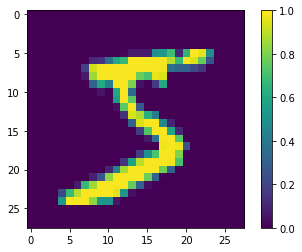

In [5]:
x=x/255.0
y=y/255.0
plt.figure()
plt.imshow(x[0])
plt.colorbar()

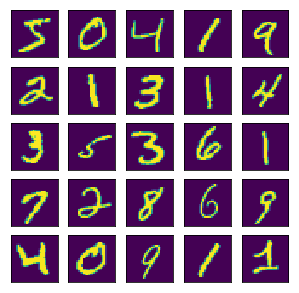

In [6]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Train the code

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2645 - acc: 0.9242
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1179 - acc: 0.9654
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0817 - acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0606 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0470 - acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0377 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0298 - acc: 0.9907
Epoch 8/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0246 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0198 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0161 - acc: 0.9949

In [10]:
test_loss, test_acc = model.evaluate(y, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
('Test accuracy:', 0.9754)


## View my results

In [11]:
predictions = model.predict(y)

In [12]:
for i in range (10):
    print (np.argmax(predictions[i]), test_labels[i])

(7, 7)
(2, 2)
(1, 1)
(0, 0)
(4, 4)
(1, 1)
(4, 4)
(9, 9)
(5, 5)
(9, 9)


In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

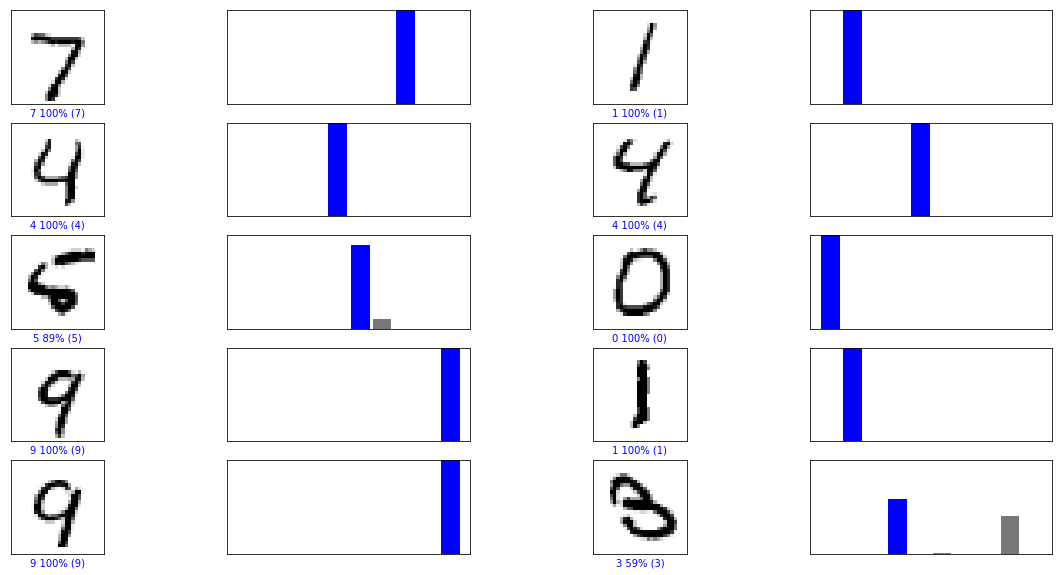

In [15]:
plt.figure(figsize=(20,10))
for i in range(0,20,2):
    plt.subplot(5,4,i+1)
    plot_image(i, predictions, test_labels, y)
    plt.subplot(5,4,i+2)
    plot_value_array(i, predictions,test_labels)